In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from atusfunclib import load_data
from activitylib import ACTINFO
from wlmetrics import *

In [208]:
def logit(x):
    return 1.0 / (1.0 + np.exp(-(x - x.mean())))

In [5]:
# Import all data
data_import = load_data(loc='data')

In [6]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes, \
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes, \
dfdemocodes = data_import

In [7]:
# Convert category columns to float
df['TEAGE_CAT'] = df['TEAGE_CAT'].astype(float)
df['TRERNWA_CAT'] = df['TRERNWA_CAT'].astype(float)

Metrics to calculate:
1. Weighted `sum(life) / sum(work)`
1. More than 10h work a day
1. % of day spent on Personal Care
1. % of day spent on Leisure
1. More than 5h childcare and housework
1. Average time Career, Social, Financial, Physical, and Community

In [8]:
w_l_balance_housework(df).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [9]:
w_l_balance_personalcare(df).head()

0    0.635417
1    0.534722
2    0.496528
3    0.541667
4    0.383333
dtype: float64

In [10]:
w_l_balance_leisuresocial(df).head()

0    0.364583
1    0.409722
2    0.236111
3    0.184028
4    0.083333
dtype: float64

In [11]:
w_l_balance_workday(df).head()

0    False
1    False
2    False
3    False
4    False
Name: t0501, dtype: bool

In [264]:
# Weights for ratio calculation
#weights_p = np.ones(len(ACTINFO['positiveWL']))
#weights_n_occ = np.ones(len(ACTINFO['negoccWL']))
#weights_n_hom = np.ones(len(ACTINFO['neghomeWL']))
weights_p = np.array([1.0, 0.2, 1.0, 0.6, 0.6, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.2])
weights_n_occ = np.array([0.0, 1.0, 0.8, 1.0])
weights_n_hom = np.array([0.0, 1.0, 0.8, 1.0])

w_l_balance_weighted_ratio(df,
                           ACTINFO['positiveWL'],
                           ACTINFO['negoccWL'],
                           weights_p,
                           weights_n_occ,
                           N=0.1).head()

0    156.745930
1    169.766905
2    100.084161
3      0.047598
4      1.022612
dtype: float64

In [283]:
ACTINFO['neghomeWL']

['0201',
 '0202',
 '0203',
 '0204',
 '0209',
 '0301',
 '0302',
 '0303',
 '0304',
 '0305',
 '0802',
 '0803']

In [281]:
df['metric1'] = logit(w_l_balance_weighted_ratio(df,
                           ACTINFO['positiveWL'],
                           ACTINFO['negoccWL'],
                           weights_p,
                           weights_n,
                           N=1))

In [266]:
df['metric2'] = w_l_balance_personalcare(df)

In [267]:
df['metric3'] = w_l_balance_leisuresocial(df)

In [268]:
df['metric4'] = w_l_balance_workday(df, workid='0501', hours=9)

In [269]:
df['metric5'] = w_l_balance_housework(df, hours=4)

In [285]:
df.filter(like="metric").head()

,metric1,metric2,metric3,metric4,metric5
0,0.999138,0.635417,0.364583,False,False
1,0.999651,0.534722,0.409722,False,False
2,0.644356,0.496528,0.236111,False,True
3,0.000173,0.541667,0.184028,False,True
4,0.000619,0.383333,0.083333,False,False


In [271]:
# Split by weekday and weekend/holiday
df_wehol = df[(df['TRHOLIDAY'] == 1) | (df['TRWEEKEND'] == 1)]
df_weday = df[(df['TRHOLIDAY'] == 0) & (df['TRWEEKEND'] == 0)]

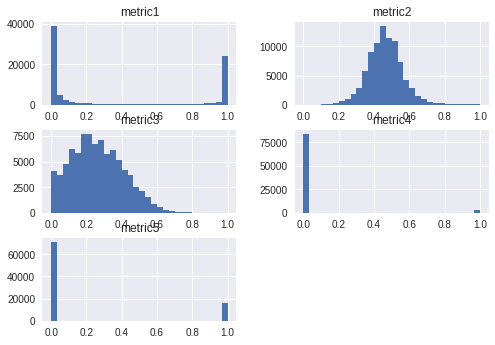

In [273]:
df_wehol.filter(like="metric").hist(bins=30);

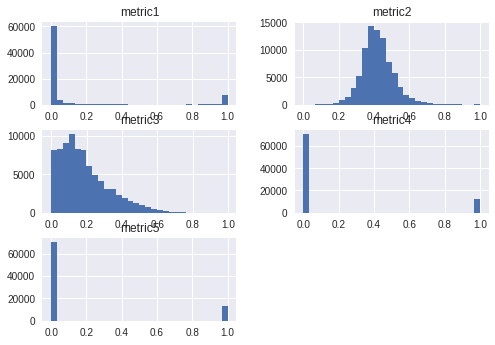

In [274]:
df_weday.filter(like="metric").hist(bins=30);

In [275]:
df_wehol.filter(like="metric").describe()

,metric1,metric2,metric3
count,87293.000000,87293.000000,87293.000000
mean,0.385504,0.463272,0.262764
std,0.444287,0.105343,0.148793
min,0.000054,0.000000,0.000000
25%,0.005100,0.399306,0.149306
50%,0.063629,0.458333,0.250000
75%,0.989941,0.520833,0.364583
max,1.000000,1.000000,0.999306


In [276]:
df_weday.filter(like="metric").describe()

,metric1,metric2,metric3
count,83549.000000,83549.000000,83549.000000
mean,0.154843,0.421443,0.188019
std,0.323280,0.097816,0.141352
min,0.000054,0.000000,0.000000
25%,0.000091,0.364583,0.083333
50%,0.000469,0.415278,0.156250
75%,0.050220,0.468750,0.263194
max,1.000000,1.000000,0.995833


In [277]:
df_wehol[['metric4', 'metric5']].mean()

metric4    0.034482
metric5    0.184620
dtype: float64

In [278]:
df_weday[['metric4', 'metric5']].mean()

metric4    0.152928
metric5    0.155358
dtype: float64

In [287]:
df_wehol.filter(like="metric").to_csv('data-results/wehol_metrics.csv', index_label='idx')

In [288]:
df_weday.filter(like="metric").to_csv('data-results/weday_metrics.csv', index_label='idx')